In [ ]:
import numpy as np
from darkflow.net.build import TFNet
import cv2

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Match contours to license plate or character template
def find_contours(dimensions, img):

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or 15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    # Read the binary image
    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    target_contours = []
    img_res = []

    # Read all contours detected
    for cntr in cntrs :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :

            # stores the x coordinate of the character's contour, to used later for indexing the contours
            x_cntr_list.append(intX)
            char_copy = np.zeros((44,24))

            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            # Draw rectangle around contour
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)

            # Display the uptated binary image with new contour
            plt.imshow(ii, cmap='gray')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            # List that stores the character's binary image (unsorted)
            img_res.append(char_copy)

    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []

    for idx in indices:
        # stores character images according to their index
        img_res_copy.append(img_res[idx])

    img_res = np.array(img_res_copy)

    return img_res

In [ ]:
# Find characters in the resulting images and Preprocess license plate image
def segment_characters(image):
    # Resizing
    img_lp = cv2.resize(image, (333, 75))

    # Apply gray scale
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)

    # Convert to binary image
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Erode unwanted pixels
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))

    # Dilate unwanted pixels
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [(LP_WIDTH/6) + 12.5, (LP_WIDTH/2) + 7.5, (LP_HEIGHT/10) - 15, 2 * LP_HEIGHT/3]

    # Visual display of binary image
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()

    # Create a binary image for next steps
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

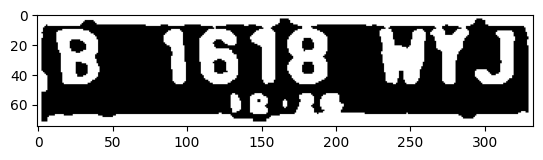

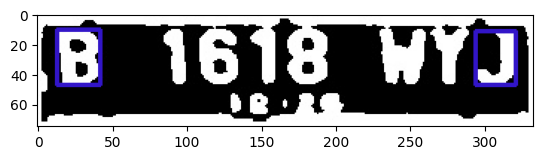

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Satria Data OCR/train/DataTrain3.png')
char = segment_characters(img)

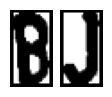

In [ ]:
for i in range(len(char)):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [ ]:
# Resizing
img_lp = cv2.resize(img, (333, 75))

# Apply gray scale
img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)

# Convert to binary image
_, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# # Erode unwanted pixels
# img_binary_lp = cv2.erode(img_binary_lp, (3,3))

# # Dilate unwanted pixels
# img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

LP_WIDTH = img_binary_lp.shape[0]
LP_HEIGHT = img_binary_lp.shape[1]

(-0.5, 332.5, 74.5, -0.5)

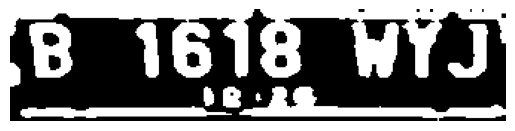

In [ ]:
plt.imshow(img_binary_lp, cmap='gray')
plt.axis('off')

In [ ]:
LP_WIDTH

75